In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Simulación de datos
np.random.seed(42)

# Generar datos aleatorios para las variables independientes
X1 = np.random.rand(100)
X2 = np.random.rand(100)
X3 = np.random.rand(100)



In [3]:
# Crear una relación lineal en las variables independientes con un término de error
y = 2 * X1 + 3 * X2 + 4 * X3 + np.random.normal(0, 0.5, 100)

# Crear un DataFrame para almacenar los datos
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

# Ajustar un modelo de regresión lineal múltiple usando statsmodels
X = sm.add_constant(data[['X1', 'X2', 'X3']])
model = sm.OLS(data['y'], X).fit()

# Imprimir resultados detallados del modelo
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     317.5
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.09e-49
Time:                        21:38:26   Log-Likelihood:                -68.859
No. Observations:                 100   AIC:                             145.7
Df Residuals:                      96   BIC:                             156.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2000      0.164     -1.220      0.2


Matriz de correlación para diagnosticar multicolinealidad:
           X1        X2        X3
X1  1.000000 -0.034033 -0.037654
X2 -0.034033  1.000000 -0.146354
X3 -0.037654 -0.146354  1.000000


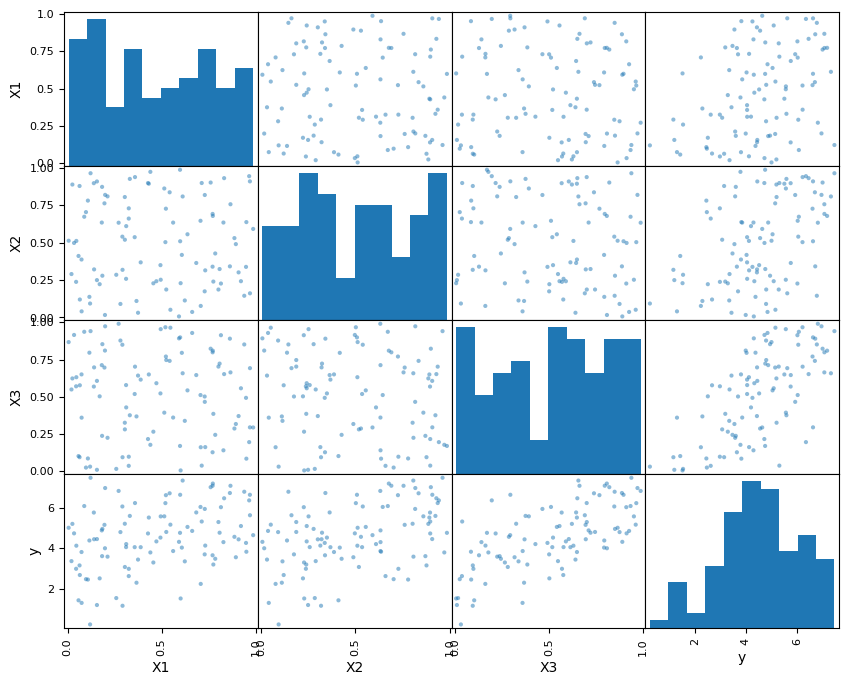

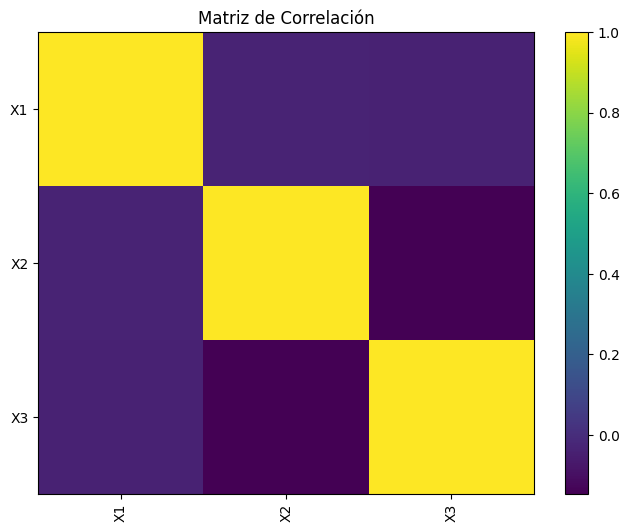

In [4]:
# Diagnóstico de multicolinealidad
corr_matrix = data[['X1', 'X2', 'X3']].corr()
print("\nMatriz de correlación para diagnosticar multicolinealidad:\n", corr_matrix)

# Gráfico de matriz de dispersión para visualizar relaciones entre variables
pd.plotting.scatter_matrix(data[['X1', 'X2', 'X3', 'y']], figsize=(10, 8))
plt.show()

# Gráfico de correlación para visualizar relaciones entre variables
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Matriz de Correlación')
plt.show()



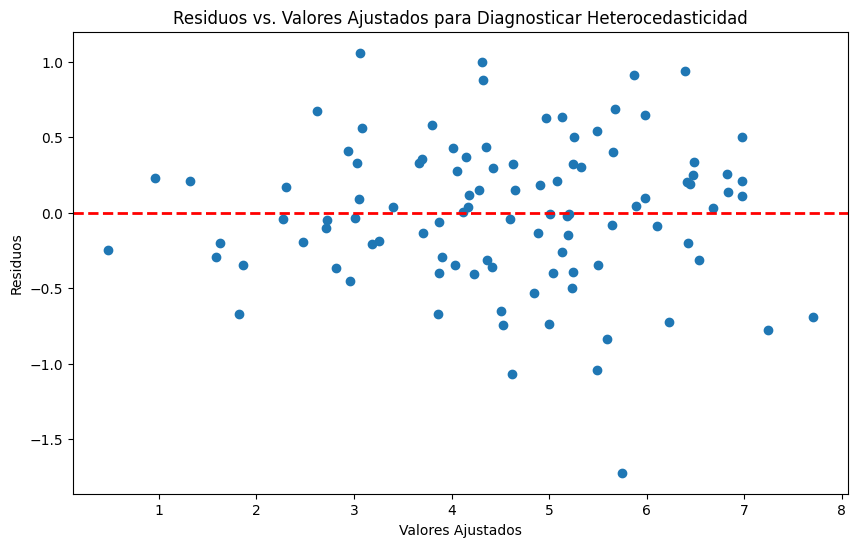

In [5]:
# Gráfico de residuos para diagnosticar heterocedasticidad
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(), residuals)
plt.title('Residuos vs. Valores Ajustados para Diagnosticar Heterocedasticidad')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

Multicollinearity

Perfect Multicollinearity

And you probably have noticed there is a condition r2X2,X3=1
 that makes the whole standard error formula invalid, this applies to any type of linear regression model, if any two independent variables perfectly correlated, the model will be invalid and can't be estimated either.

Not only two variable cases, in the multiple regression, an independent variable might be a linear combination of some other variables. It's would be arduous work to detect where correlations originate, because pairwise correlation might seem totally normal.

In [7]:
df = pd.read_excel('../data/Basic_Econometrics_practice_data.xlsx', sheet_name = 'US_CobbDauglas')
df = df[df.columns[1:4]] # pick the data columns
df.columns = ['Y', 'L', 'K']
np.corrcoef(df['L'], df['K'])

array([[1.        , 0.94201238],
       [0.94201238, 1.        ]])

C:\Users\fuent\AppData\Local\Temp\ipykernel_18312\2096078897.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_array.append(model.params[0])
C:\Users\fuent\AppData\Local\Temp\ipykernel_18312\2096078897.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta2_array.append(model.params[1])
C:\Users\fuent\AppData\Local\Temp\ipykernel_18312\2096078897.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta3_array.append(mod

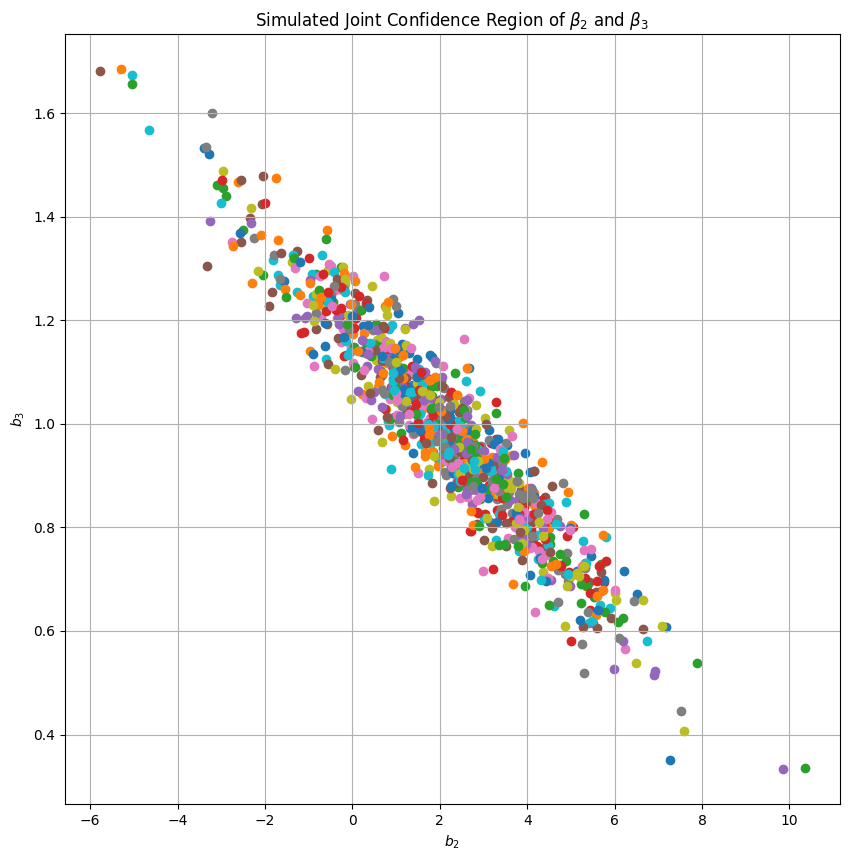

In [8]:
beta1, beta2, beta3 = 3, 2, 1 # pre-set the parameters
beta1_array, beta2_array, beta3_array = [], [], []
np.random.seed(100) # reproducible results
for i in range(1000):
    u = 100*np.random.randn(30)
    v = 100*np.random.randn(30)
    X2 = np.linspace(10, 100, 30)
    X3 = 10*X2 + v
    Y = beta1 + beta2*X2 + beta3*X3 + u

    df = pd.DataFrame([Y, X2, X3]).transpose()
    df.columns = ['Y', 'X2', 'X3']

    X_inde = df[['X2', 'X3']]
    Y = df['Y']

    X_inde = sm.add_constant(X_inde)

    model = sm.OLS(Y, X_inde).fit()
    beta1_array.append(model.params[0])
    beta2_array.append(model.params[1])
    beta3_array.append(model.params[2])
fig, ax = plt.subplots(figsize = (10, 10))
ax.grid()
for i in range(1000):
    ax.scatter(beta2_array[i], beta3_array[i]) # no need for a loop, i just want different colors
ax.set_xlabel(r'$b_2$')
ax.set_ylabel(r'$b_3$')
ax.set_title(r'Simulated Joint Confidence Region of $\beta_2$ and $\beta_3$')
plt.show()

In [9]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     210.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           3.33e-17
Time:                        21:39:00   Log-Likelihood:                -176.49
No. Observations:                  30   AIC:                             359.0
Df Residuals:                      27   BIC:                             363.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1650     38.089      0.057      0.9

Detection of Multicollinearity
Like we mentioned before, multicollinearity is a question of degree rather than presence, we only address the issue when it is so severe that interferes all the estimation results. Here are some rules help you to detect multicollinearity.

High R2
 but few significant t
-statistic
We have seen why this is the case above, you should consider this possibility when very few t
-test are significant.

High pairwise correlation
If there are more than 2
 independent variables, check their pairwise correlation. You can compute correlation coefficient matrix with pandas and visualize with seaborn. Here's an example.

In [10]:
n = 1000
x1 = np.random.randn(n)
x2 = np.random.rand(n)
x3 = np.random.standard_t(100, size=n)  # Using np.random to generate t-distributed random variables
x4 = x2 * x1 - x3
x5 = x2 / x3
x6 = np.log(x2)

In [11]:
df = pd.DataFrame([x1, x2, x3, x4, x5, x6]).T
df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
df.corr()

,x1,x2,x3,x4,x5,x6
x1,1.000000,-0.019698,-0.053227,0.486217,0.077770,-0.000563
x2,-0.019698,1.000000,-0.042672,0.009597,-0.039832,0.873222
x3,-0.053227,-0.042672,1.000000,-0.865990,0.019692,-0.052920
x4,0.486217,0.009597,-0.865990,1.000000,0.038408,0.027842
x5,0.077770,-0.039832,0.019692,0.038408,1.000000,-0.023725
x6,-0.000563,0.873222,-0.052920,0.027842,-0.023725,1.000000


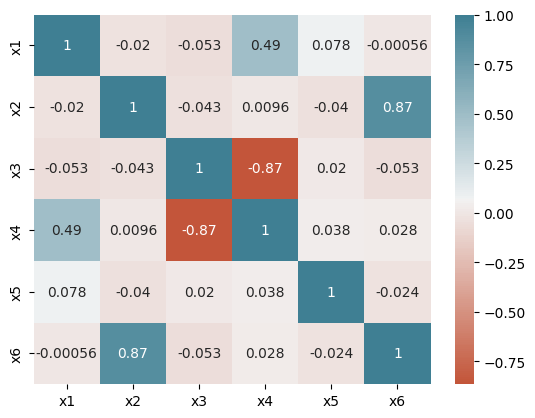

In [12]:
sns.heatmap(df.corr(),
            annot = True,
            cmap=sns.diverging_palette(20, 220, n=200)); plt.show()

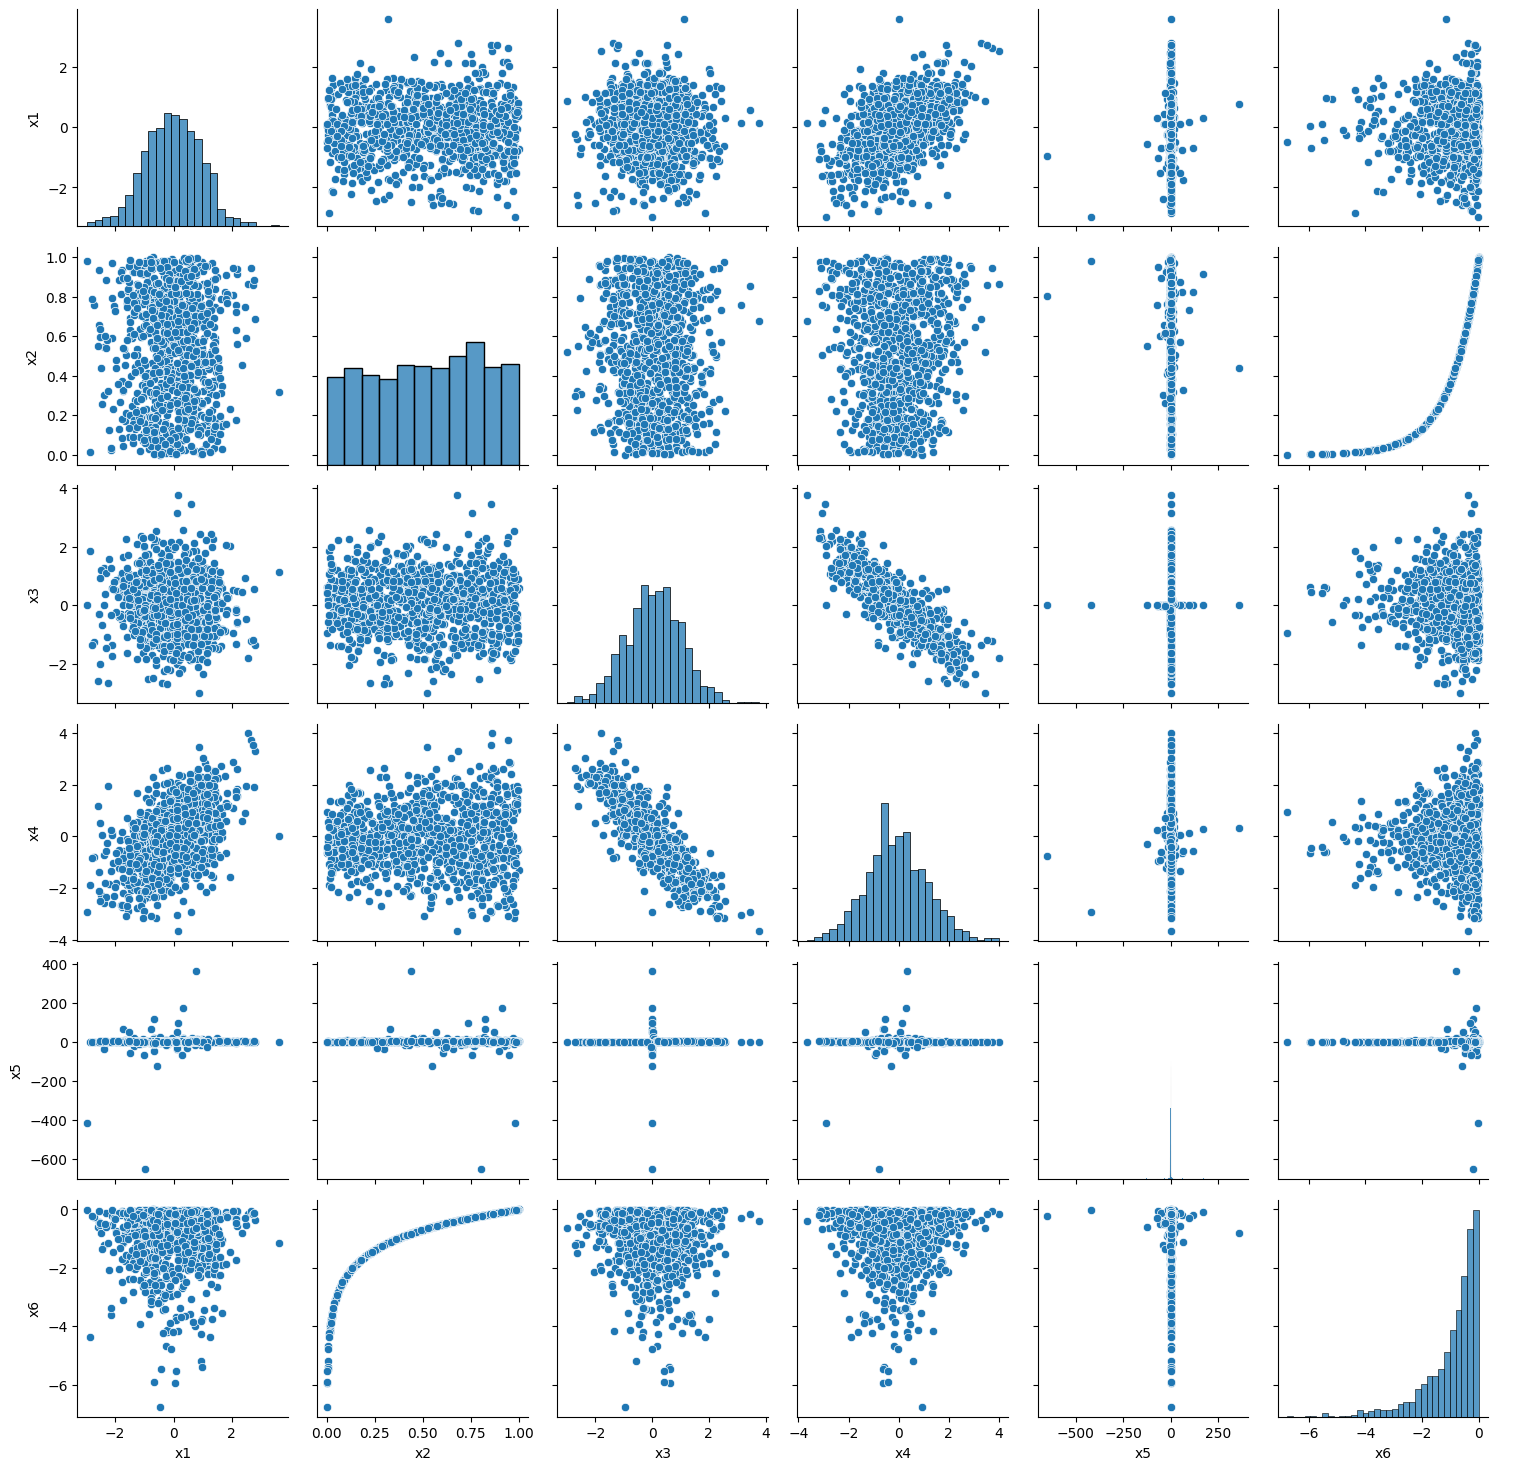

In [13]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()